# Notebook Logistic Regression

Logistic Regression adalah salah satu jenis algoritma pembelajaran mesin yang sangat mendasar, tetapi sangat cukup praktis dalam aplikasinya. Di sini, kita akan belajar mengenai aplikasi Logistic Regression dengan menggunakan data berupa Breast Cancer Dataset. Kita diminta mengklasifikasikan apakah suatu jenis kanker tergolong Benignant (Jinak) ataukah Malignant (Ganas). Karena ini bersifat dasar, kita belum perlu melakukan preprocessing data. Dalam kenyataannya, kita perlu melakukan preprocessing data karena data yang ada secara nyata biasanya tidak lengkap ataupun mengandung anomali.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn import datasets
np.set_printoptions(precision=3, suppress=False)

In [36]:
breast_cancer = datasets.load_breast_cancer(as_frame=True)

df = breast_cancer.data
df["is_malignant"] = 0
df.loc[breast_cancer.target ==1, "is_malignant"] = 1



In [37]:
def split_data(X, Y, test_sixe=0.2):
    data_size = len(X)
    test_size = int(data_size * test_size)
    test_index = random.sample(range(data_size), test_size)
    train_index = [i for i in range(data_size) if i not in test_index]
    X_train = X[train_index]
    Y_train = Y[train_index]
    X_test = X[test_index]
    Y_test = Y[test_index]
    return X_train, Y_train, X_test, Y_test
    

### Logistic Regression : Linear Regression dengan fungsi sigmoid

Misal regresi linear yang digunakan untuk memprediksi suatu nilai variabel dependen memiliki rumus $$ z = \theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{n} x_n  $$

Maka rumus regresi logistik yang digunakan untuk mengategorikan secara biner dua variabel adalah

$$ Ln(\frac{P}{1-P}) = \theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{n} x_n  $$


atau dapat dituliskan $$ P =  \frac{e^{\theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{n} x_n}}{1+e^{\theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{n} x_n}} $$ atau $$P =  \frac{1}{1+e^{-(\theta_{0} + \theta_{1} x_1 + \theta_{2} x_2 + ... + \theta_{n} x_n)}} $$
$$P =  \frac{1}{1+e^{-z}} $$


Catatan : Pada beberapa literatur dan beberapa bagian selanjutnya, P akan ditulis sebagai $h(z)$ atau sebuah fungsi yang memprediksi suatu nilai berdasarkan masukan nilai z

Untuk mengklasifikasikan 2 kelas, kita bisa tuliskan $$ P = \{^{\ge0.5,class=1 }_{<0.5,class=0}  $$

Karena z berada di rentang $-\infty$ sampai $\infty$, bisa simpulkan bahwa P akan berada di rentang 0 sampai 1. Bila z=0, P akan bernilai 0,5 yang menandakan batas klasifikasi 2 kelas

### Menentukan Persamaan Logistic Regression


Seperti pada kasus regresi linear, kita bisa menyelesaikan permasalahan regresi logistik dengan menggunakan metode yang serupa. Kita bisa mencari nilai secara non iteratif dengan menyelesaikan persamaan Least Square berupa $X\hat{\theta}=Y$ yang merupakan permasalahan mendasar Aljabar Linear atau kita bisa menyelesaikan secara iteratif dengan menggunakan Metode Gradient Descent yang disimbolkan dengan $$ \theta_j = \theta_j - \alpha \nabla $$

Dengan $\theta$ sebagai koefisien persamaan yang kita cari, $\alpha$ sebagai learning rate, dan $\nabla$ sebagai gradien dari Cost Function, atau secara matematis 
$$ \nabla = \frac{\partial}{\partial \theta_j}J(\theta)$$

### Cost function

Secara umum, cost function suatu persamaan Logistic Regression bisa dinyatakan sebagai penjumlahan Loss Function untuk setiap data-data yang dijadikan sampel

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(x(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(x(\theta)^{(i)}))\tag{5} $$
* $m$ adalah jumlah data yang diberikan
* $y^{(i)}$ adalah nilai yang sebenarnya
* $h(x^{(i)})$ adalah nilai yang diprediksi oleh persamaan Logistic Regression

Untuk satu data, Loss function dapat dinyatakan sebagai 
$$ Loss = -1 \times \left( y^{(i)}\log (h(x(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(x(\theta)^{(i)})) \right)$$

* Karena nilai h berada pada kisaran $0\le h \le 1$, $log(h)$ pasti negatif. Itulah yang menyebabkan adanya pengali -1 di depan
* Semisal nilai prediksi persamaan adalah 1 ($h(x(\theta)) = 1$) dan label dari data 'y' juga 1, nilai loss suatu fungsi adalah 0. 
* Begitu pula, semisal nilai prediksi persamaan adalah 0 ($h(x(\theta)) = 0$) dan label dari data 'y' juga 1, nilai loss suatu fungsi adalah 0. 
* Dapat dilihat pula, bila nilai prediksi $h(x(\theta))=0$ dan label data 'y' bernilai 1 ataupun sebaliknya, lossnya akan bernilai tak hingga sehingga Cost Function akan menjadi besar saat ada kesalahan prediksi


Secara keseluruhan, nilai gradien dari Cost Function ini adalah
$$ \nabla = \frac{\partial}{\partial \theta_j}J(\theta) = -\frac{1}{m} \sum_{i=1}^m y^{(i)}\log (h(x(\theta)^{(i)})) + (1-y^{(i)})\log (1-h(x(\theta)^{(i)}))\tag{5} =
-\frac{1}{m} \sum_{i=1}^m (h(x(\theta)^{(i)})-y^{(i)})x^{(i)}$$

Sehingga persamaan tersebut bisa kita gunakan untuk menyelesaikan permasalahan Logistic Regression ini

In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


* The number of iterations 'num_iters" is the number of times that you'll use the entire training set.
* For each iteration, you'll calculate the cost function using all training examples (there are 'm' training examples), and for all features.
* Instead of updating a single weight $\theta_i$ at a time, we can update all the weights in the column vector:  
$$\mathbf{\theta} = \begin{pmatrix}
\theta_0
\\
\theta_1
\\ 
\theta_2 
\\ 
\vdots
\\ 
\theta_n
\end{pmatrix}$$
* $\mathbf{\theta}$ has dimensions (n+1, 1), where 'n' is the number of features, and there is one more element for the bias term $\theta_0$ (note that the corresponding feature value $\mathbf{x_0}$ is 1).
* The 'logits', 'z', are calculated by multiplying the feature matrix 'x' with the weight vector 'theta'.  $z = \mathbf{x}\mathbf{\theta}$
    * $\mathbf{x}$ has dimensions (m, n+1) 
    * $\mathbf{\theta}$: has dimensions (n+1, 1)
    * $\mathbf{z}$: has dimensions (m, 1)
* The prediction 'h', is calculated by applying the sigmoid to each element in 'z': $h(z) = sigmoid(z)$, and has dimensions (m,1).
* The cost function $J$ is calculated by taking the dot product of the vectors 'y' and 'log(h)'.  Since both 'y' and 'h' are column vectors (m,1), transpose the vector to the left, so that matrix multiplication of a row vector with column vector performs the dot product.
$$J = \frac{-1}{m} \times \left(\mathbf{y}^T \cdot log(\mathbf{h}) + \mathbf{(1-y)}^T \cdot log(\mathbf{1-h}) \right)$$
* The update of theta is also vectorized.  Because the dimensions of $\mathbf{x}$ are (m, n+1), and both $\mathbf{h}$ and $\mathbf{y}$ are (m, 1), we need to transpose the $\mathbf{x}$ and place it on the left in order to perform matrix multiplication, which then yields the (n+1, 1) answer we need:
$$\mathbf{\theta} = \mathbf{\theta} - \frac{\alpha}{m} \times \left( \mathbf{x}^T \cdot \left( \mathbf{h-y} \right) \right)$$

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [39]:
def gradientDescent(x,y,theta,alpha,iterations):
    """
    x: input data
    y: output data
    theta: initial theta
    alpha: learning rate
    iterations: number of iterations
    J: cost function
    """
    m = len(y)
    J_history = np.zeros(iterations)
    for i in range(iterations):
        z = np.dot(x,theta)
        h = sigmoid(z)

        J_history[i] = (-1/m) * (np.dot(y.T,np.log(h)) + np.dot((1-y).T,np.log(1-h)))
        print("Iteration: ",i," Cost: %.4f"%float(J_history[i]))
        grad = (1/m) * np.dot(x.T,(h-y))
        theta = theta - alpha * grad
    print("Final cost: %.4f"%float(J_history[-1]))
    visualize_cost(J_history)
    return theta

def visualize_cost(J_history):
    x = np.arange(len(J_history))
    plt.plot(x,J_history)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

In [40]:
X = df.drop(["is_malignant"],axis=1).values
Y = df["is_malignant"].values
X_train, Y_train, X_test, Y_test = split_data(X, Y, test_size=0.2)

Iteration:  0  Cost: 0.6931
Iteration:  1  Cost: 0.7439
Iteration:  2  Cost: 0.9891
Iteration:  3  Cost: 1.5071
Iteration:  4  Cost: 0.9495
Iteration:  5  Cost: 1.4742
Iteration:  6  Cost: 0.9365
Iteration:  7  Cost: 1.4617
Iteration:  8  Cost: 0.9109
Iteration:  9  Cost: 1.4345
Iteration:  10  Cost: 0.8954
Iteration:  11  Cost: 1.4144
Iteration:  12  Cost: 0.8763
Iteration:  13  Cost: 1.3873
Iteration:  14  Cost: 0.8624
Iteration:  15  Cost: 1.3632
Iteration:  16  Cost: 0.8476
Iteration:  17  Cost: 1.3356
Iteration:  18  Cost: 0.8357
Iteration:  19  Cost: 1.3099
Iteration:  20  Cost: 0.8234
Iteration:  21  Cost: 1.2825
Iteration:  22  Cost: 0.8128
Iteration:  23  Cost: 1.2567
Iteration:  24  Cost: 0.8021
Iteration:  25  Cost: 1.2302
Iteration:  26  Cost: 0.7924
Iteration:  27  Cost: 1.2047
Iteration:  28  Cost: 0.7826
Iteration:  29  Cost: 1.1791
Iteration:  30  Cost: 0.7734
Iteration:  31  Cost: 1.1542
Iteration:  32  Cost: 0.7643
Iteration:  33  Cost: 1.1294
Iteration:  34  Cost: 0.

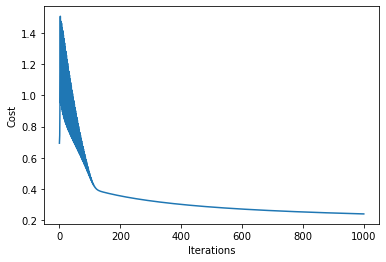

In [41]:
theta = np.zeros(X.shape[1])
theta = gradientDescent(X_train, Y_train,theta,0.00001,1000)

In [42]:
def predict_class(x, theta):
    return 1 if sigmoid(np.dot(x, theta)) >= 0.5 else 0

In [43]:
def test_logistic_regression(x, y, theta):
    correct = 0
    for i in range(len(x)):
        if predict_class(x[i], theta) == y[i]:
            correct += 1
    return correct / len(x)

In [44]:
test_logistic_regression(X_test, Y_test, theta)

0.8938053097345132